<a href="https://colab.research.google.com/github/akaikim/test_2/blob/main/Google_data_trip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from numpy import arange
from matplotlib import pyplot
import matplotlib.pyplot as plt
import pandas as pd
import re
import csv
from pandas import read_csv
from pandas import set_option
from datetime import datetime

In [2]:
#read csv file
%cd '/content/drive/MyDrive/data'
Jan = pd.read_csv('202101.csv')
Feb = pd.read_csv('202102.csv')
Mar = pd.read_csv('202103.csv')
Apr = pd.read_csv('202104.csv')
May = pd.read_csv('202105.csv')
Jun = pd.read_csv('202106.csv')
Jul = pd.read_csv('202107.csv')
Aug = pd.read_csv('202108.csv')
Sep = pd.read_csv('202109.csv')
Oct = pd.read_csv('202110.csv')
Nov = pd.read_csv('202111.csv')
Dec = pd.read_csv('202112.csv')

/content/drive/MyDrive/data


In [ ]:
#Display each column name and check for consistency
Jan.info()
Feb.info()
Mar.info()
Apr.info()
May.info()
Jun.info()
Jul.info()
Aug.info()
Sep.info()
Oct.info()
Nov.info()
Dec.info()

In [4]:
#Combine dataframes into big one
Year2021 = pd.concat([Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec])
Year2021.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5595063 entries, 0 to 247539
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 597.6+ MB


In [5]:
#Convert to datetime format
Year2021['started_at'] = pd.to_datetime(Year2021['started_at'])
Year2021['ended_at'] = pd.to_datetime(Year2021['ended_at'])

In [6]:
#create a weekday_name column
Year2021['day_of_week'] = Year2021['started_at'].dt.day_name()
#create a month_name column
Year2021['month'] = Year2021['started_at'].dt.month
Year2021.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week,month
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member,Saturday,1
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member,Wednesday,1
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member,Thursday,1
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member,Thursday,1
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual,Saturday,1


In [7]:
#Delete Latitude and Longitude columns.
Year2021.drop(columns = ['start_lat', 'start_lng', 'end_lat', 'end_lng'], inplace = True)


In [8]:
#Inspect the new table that has been created
Year2021.info()
print("First 5 rows: ", end='\n')
print(Year2021.head(5))
print("Number of rows: " , Year2021.shape[0])  #count rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5595063 entries, 0 to 247539
Data columns (total 11 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   member_casual       object        
 9   day_of_week         object        
 10  month               int64         
dtypes: datetime64[ns](2), int64(1), object(8)
memory usage: 512.2+ MB
First 5 rows: 
            ride_id  rideable_type          started_at            ended_at  \
0  E19E6F1B8D4C42ED  electric_bike 2021-01-23 16:14:19 2021-01-23 16:24:44   
1  DC88F20C2C55F27F  electric_bike 2021-01-27 18:43:08 2021-01-27 18:47:12   
2  EC45C94683FE3F27  electric_bike 2021-01-21 22

In [9]:
#Removing rows with missing values
Year2021.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
print("Number of rows: " , Year2021.shape[0])

Number of rows:  4588302


In [10]:
#Flitering started_at data that is greater than ended_at
Year2021 = Year2021[Year2021['started_at'] < Year2021['ended_at']]
print("Number of rows: " , Year2021.shape[0])

Number of rows:  4588104


In [11]:
#Add new column to calculate each ride length in mins
Year2021['ride_length (mins)'] = Year2021['ended_at'] - Year2021['started_at'] 
Year2021['ride_length (mins)'] = Year2021['ride_length (mins)'].astype('timedelta64[s]') #convert ride_length from format days H:M:S to second
Year2021['ride_length (mins)'] = Year2021['ride_length (mins)']/60 #convert to minutes

print(Year2021.head())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


             ride_id  rideable_type          started_at            ended_at  \
9   B9F73448DFBE0D45   classic_bike 2021-01-24 19:15:38 2021-01-24 19:22:51   
10  457C7F4B5D3DA135  electric_bike 2021-01-23 12:57:38 2021-01-23 13:02:10   
11  57C750326F9FDABE  electric_bike 2021-01-09 15:28:04 2021-01-09 15:37:51   
12  4D518C65E338D070  electric_bike 2021-01-09 15:28:57 2021-01-09 15:37:54   
13  9D08A3AFF410474D   classic_bike 2021-01-24 15:56:59 2021-01-24 16:07:08   

            start_station_name start_station_id            end_station_name  \
9   California Ave & Cortez St            17660      Wood St & Augusta Blvd   
10  California Ave & Cortez St            17660  California Ave & North Ave   
11  California Ave & Cortez St            17660      Wood St & Augusta Blvd   
12  California Ave & Cortez St            17660      Wood St & Augusta Blvd   
13  California Ave & Cortez St            17660      Wood St & Augusta Blvd   

   end_station_id member_casual day_of_week  month

In [12]:
#performing statistical analysis

#1. Mean
mean = Year2021['ride_length (mins)'].mean()
#2. Median
median = Year2021['ride_length (mins)'].median()
#3. Standard deviation
std = Year2021['ride_length (mins)'].std()
#4. max
max = Year2021['ride_length (mins)'].max()
#5. min
min = Year2021['ride_length (mins)'].min()

data = [mean, median, std, max, min]
stats = pd.DataFrame(data,
                     columns = ['value'],
                     index = ['mean', 'median', 'std', 'max', 'min'])
print(stats)

               value
mean       21.811925
median     12.200000
std       184.428904
max     55944.150000
min         0.016667


In [13]:
casual =  Year2021.loc[Year2021['member_casual'] == 'casual']
member = Year2021.loc[Year2021['member_casual'] == 'member']

#compare members and casual users by mean
casual_mean = casual['ride_length (mins)'].mean()
print('casual_mean: ', casual_mean)
member_mean = member['ride_length (mins)'].mean()
print('member_mean: ', member_mean, end='\n'*2)

#compare members and casual users by median
casual_median = casual['ride_length (mins)'].median()
print('casual_median: ', casual_median)
member_median = member['ride_length (mins)'].median()
print('member_median: ', member_median, end='\n'*2)

#compare members and casual users by Standard deviation
casual_std = casual['ride_length (mins)'].std()
print('casual_std: ', casual_std)
member_std = member['ride_length (mins)'].std()
print('member_std: ', member_std, end='\n'*2)

#compare members and casual users by max
casual_max = casual['ride_length (mins)'].max()
print('casual_max: ', casual_max)
member_max = member['ride_length (mins)'].max()
print('member_max: ', member_max, end='\n'*2)

#compare members and casual users by min
casual_min = casual['ride_length (mins)'].min()
print('casual_min: ', casual_min)
member_min = member['ride_length (mins)'].min()
print('member_min: ', member_min, end='\n'*2)

casual_mean:  32.51015124560083
member_mean:  13.1840086484432

casual_median:  16.65
member_median:  9.716666666666667

casual_std:  274.9568835738806
member_std:  17.548593602111143

casual_max:  55944.15
member_max:  1495.6333333333334

casual_min:  0.016666666666666666
member_min:  0.016666666666666666



           Monday    Tuesday  Wednesday   Thursday     Friday   Saturday  \
casual  32.637242  28.803354  28.269635  28.011003  30.919069  34.872406   
member  12.725203  12.388018  12.458150  12.353695  12.792613  14.819790   

           Sunday  
casual  37.603605  
member  15.194649  


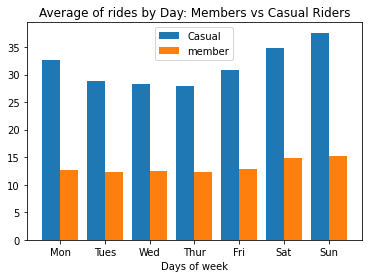

In [14]:
#average ride length by each day of the week of member and casual users

week_day = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
avg_casual = []
avg_member = []
sample_casual = 0
sample_member = 0
for i in week_day:
  casual_df = casual.loc[casual['day_of_week'] == i]
  member_df = member.loc[member['day_of_week'] == i]

  sample_casual = casual_df['ride_length (mins)'].mean()
  sample_member = member_df['ride_length (mins)'].mean()

  avg_casual.append(sample_casual)
  avg_member.append(sample_member)

avg_day_of_week = pd.DataFrame([avg_casual,avg_member],
                            columns = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
                            index = ['casual','member'])             
print(avg_day_of_week)
#Visual
x = np.arange(7)
y1 = avg_casual
y2 = avg_member
width = 0.4
plt.bar(x-0.2, y1, width)
plt.bar(x+0.2, y2, width)

plt.xticks(x, ['Mon','Tues','Wed','Thur','Fri','Sat','Sun'])
plt.xlabel("Days of week")
plt.legend(["Casual", "member"])
plt.title('Average of rides by Day: Members vs Casual Riders')
plt.show()

            1      2       3       4       5       6       7       8       9  \
casual  14690   8613   75641  120418  216823  304184  369401  341463  292920   
member  68818  34381  130046  177781  234155  304579  322892  332914  328183   

            10      11      12  
casual  189115   69958   45076  
member  288851  185909  131293  


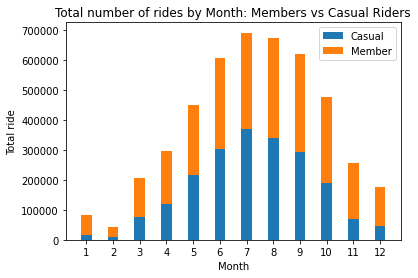

In [15]:
#Total number of rides by Month: Members vs Casual Riders
month = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
total_casual = []
total_member = []
sample_casual = 0
sample_member = 0
for i in month:
  casual_df = casual.loc[casual['month'] == i]
  member_df = member.loc[member['month'] == i]

  sample_casual = casual_df['ride_length (mins)'].count()
  sample_member = member_df['ride_length (mins)'].count()

  total_casual.append(sample_casual)
  total_member.append(sample_member)

total_ride_month = pd.DataFrame([total_casual,total_member],
                           columns = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'],
                           index = ['casual','member'])             
print(total_ride_month)
#Visual\
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
width = 0.4       
plt.bar(labels, total_casual, width, label='Casual')
plt.bar(labels, total_member, width,  bottom=total_casual,
       label='Member')
plt.xlabel('Month')
plt.ylabel('Total ride')
plt.title('Total number of rides by Month: Members vs Casual Riders')
plt.legend()
plt.show()

In [16]:
casual['rideable_type'].value_counts()

classic_bike     1261508
electric_bike     474754
docked_bike       312040
Name: rideable_type, dtype: int64

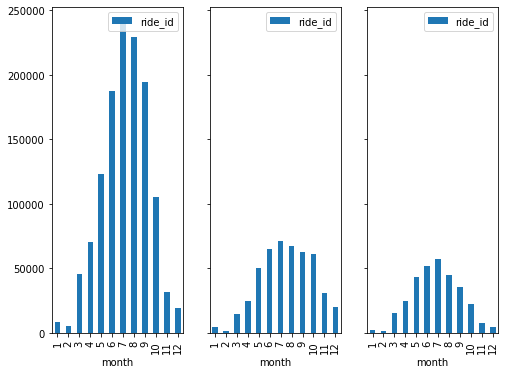

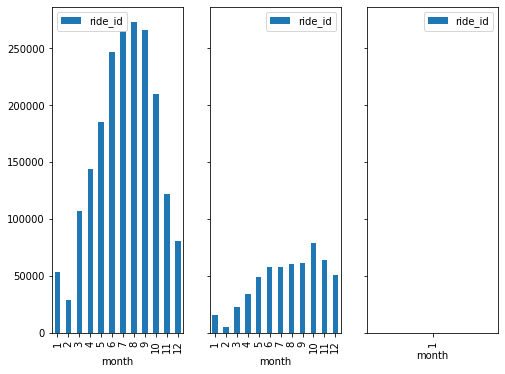

In [17]:
ride_type = ('classic_bike','electric_bike','docked_bike')
k = 0
fig, axes = plt.subplots(1,3, figsize=(8,6), sharex=True, sharey=True)
axes.ravel()
for i in ride_type:
  casual_df = casual.groupby(['month','rideable_type'], as_index = False)[['ride_id']].count()
  casual_df.where(casual_df['rideable_type'] == i, inplace = True)
  casual_df.dropna(inplace = True)
  casual_df[['month', 'ride_id']] = casual_df[['month', 'ride_id']].astype(int)
#  x = casual_df['month'].tolist()
#  y = casual_df['ride_id'].tolist()

  casual_df.plot.bar(x = 'month', y = 'ride_id', ax=axes[k])
  k += 1


fig, axes = plt.subplots(1,3, figsize=(8,6), sharey=True)
k = 0
for i in ride_type:
  member_df = member.groupby(['month','rideable_type'], as_index = False)[['ride_id']].count()
  member_df.where(member_df['rideable_type'] == i, inplace = True)
  member_df.dropna(inplace = True)
  member_df[['month', 'ride_id']] = member_df[['month', 'ride_id']].astype(int)
  member_df.plot.bar(x = 'month', y = 'ride_id', ax=axes[k])
  k += 1
    

#x = month
#y = [1, 0,0,0,0,0,0,0,0,0,0,0]
#plt.subplot(1,3,3)
#plt.bar(x,y)
